In [8]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [1]:
# Libraries for exploring, handling and visualizing data
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns, plotly.express as px
# Sklearn's preprocessing library
from sklearn.preprocessing import StandardScaler
# Importing train and test data split
from sklearn.model_selection import train_test_split
# Sklearn's metrics to evaluate our models
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, recall_score, f1_score
# Classifiers
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

# Setting theme style and color palette to seaborn 
sns.set_theme(context = 'notebook', style='darkgrid',palette='dark')

In [2]:
df_train = pd.read_csv('./train.csv')
df_val = pd.read_csv('./val.csv')
df_test = pd.read_csv('./test.csv')

In [3]:
df_train.isnull().values.any(), df_val.isnull().values.any(),df_test.isnull().values.any()

(False, False, False)

In [4]:
df_val.dtypes

ID         int64
V1       float64
V2       float64
V3       float64
V4       float64
V5       float64
V6       float64
V7       float64
V8       float64
V9       float64
V10      float64
V11      float64
V12      float64
V13      float64
V14      float64
V15      float64
V16      float64
V17      float64
V18      float64
V19      float64
V20      float64
V21      float64
V22      float64
V23      float64
V24      float64
V25      float64
V26      float64
V27      float64
V28      float64
V29      float64
V30      float64
Class      int64
dtype: object

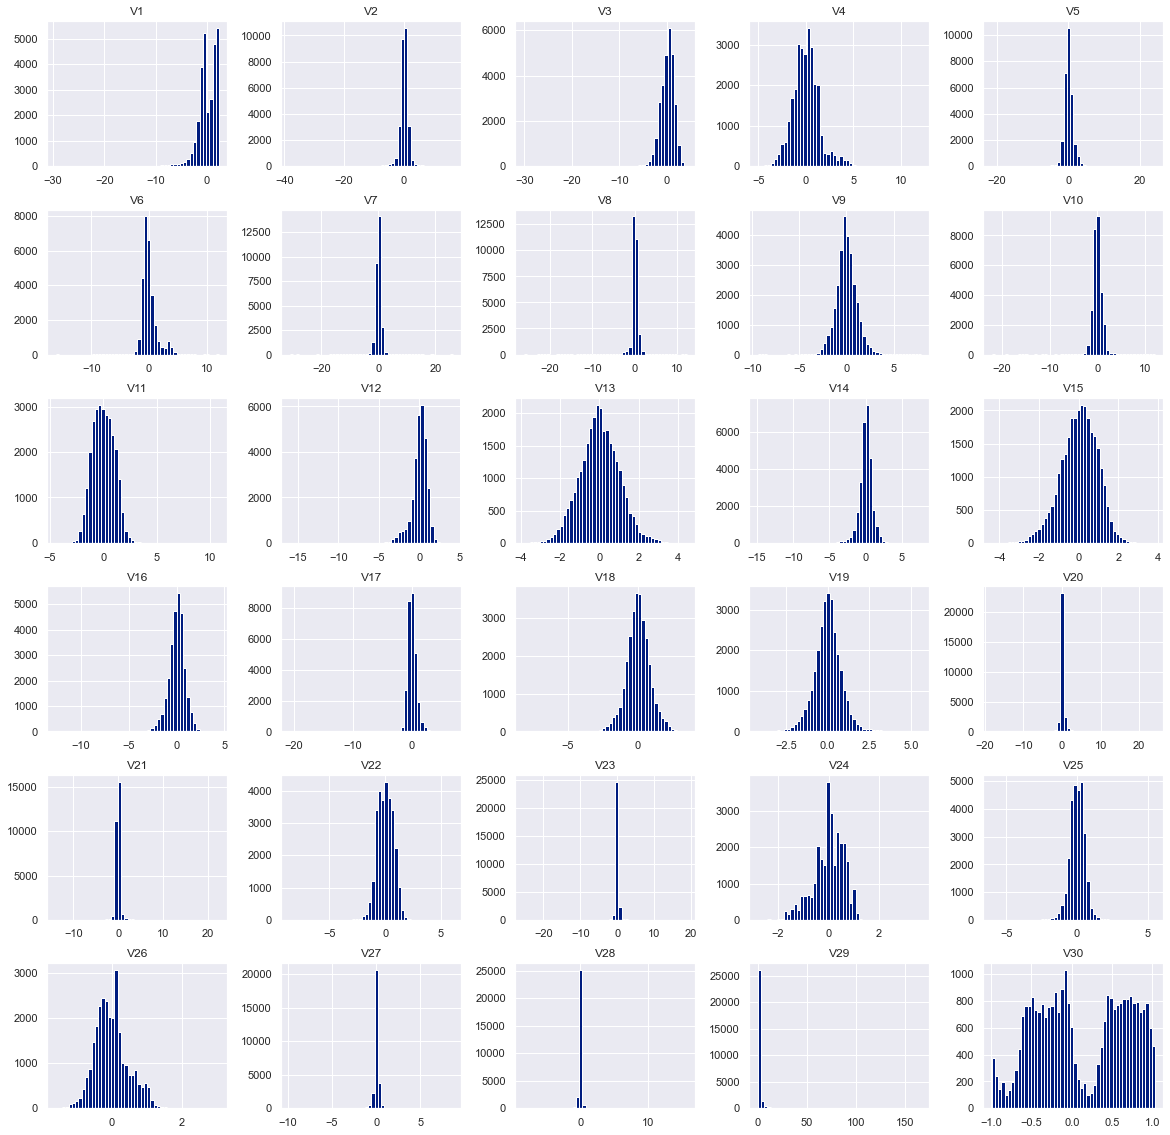

In [5]:
df_val.drop(columns=['ID','Class']).hist(bins = 50, figsize = (20,20))
plt.show()

<AxesSubplot:ylabel='Class'>

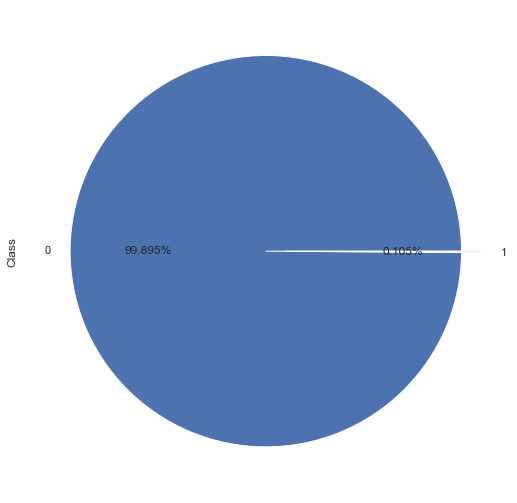

In [6]:
# Visualizing distribution of genuine and fraudulent transactions
sns.set(rc={'figure.figsize':(12,9)})
df_val.Class.value_counts().plot(kind='pie',autopct='%.3f%%',explode=(0,0.1))

In [7]:
# Label 제거
train_x = df_train.drop(columns=['ID']) 
val_x = df_val.drop(columns=['ID','Class']) 
val_y = df_val['Class'] # Label
test_x = df_test.drop(columns=['ID']) 

In [8]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 8661122885758768663
 xla_global_id: -1]

In [9]:
from sklearn.manifold import TSNE
standardized_data = StandardScaler().fit_transform(df_train)
data_50k = standardized_data[0:50000]
tsne = TSNE(n_components=3, verbose=1, perplexity=40, n_iter=250)
standardized_data_reduced = tsne.fit_transform(data_50k)

D:\user\User\CEO\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
D:\user\User\CEO\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 50000 samples in 0.007s...
[t-SNE] Computed neighbors for 50000 samples in 3.408s...
[t-SNE] Computed conditional probabilities for sample 1000 / 50000
[t-SNE] Computed conditional probabilities for sample 2000 / 50000
[t-SNE] Computed conditional probabilities for sample 3000 / 50000
[t-SNE] Computed conditional probabilities for sample 4000 / 50000
[t-SNE] Computed conditional probabilities for sample 5000 / 50000
[t-SNE] Computed conditional probabilities for sample 6000 / 50000
[t-SNE] Computed conditional probabilities for sample 7000 / 50000
[t-SNE] Computed conditional probabilities for sample 8000 / 50000
[t-SNE] Computed conditional probabilities for sample 9000 / 50000
[t-SNE] Computed conditional probabilities for sample 10000 / 50000
[t-SNE] Computed conditional probabilities for sample 11000 / 50000
[t-SNE] Computed conditional probabilities for sample 12000 / 50000
[t-SNE] Computed conditional probabilities for sa

In [11]:
tsne_df = pd.DataFrame(standardized_data_reduced, columns = ['component 0', 'component 1', 'component 2'])

In [12]:
tsne_df

,component 0,component 1
0,0.093356,4.363191
1,-1.857278,3.985774
2,-1.531585,-1.190436
3,-0.524535,0.162778
4,-4.879379,0.379633
...,...,...
49995,-0.211723,0.938187
49996,-1.281278,-1.094344
49997,-2.098377,1.959839
49998,-2.048630,1.968163


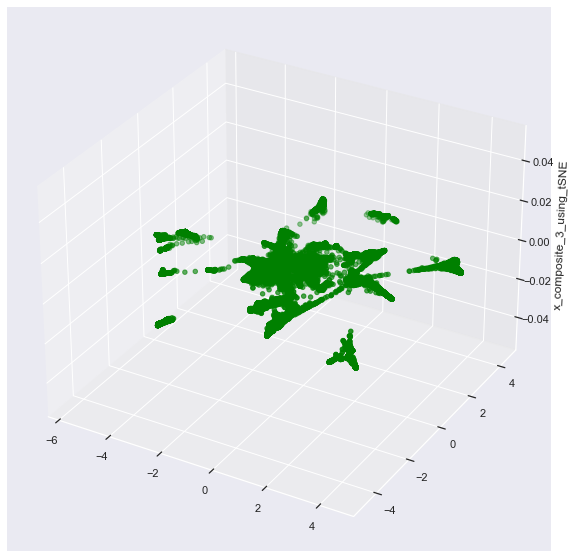

In [15]:
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111, projection='3d')
ax.set_zlabel("x_composite_3_using_tSNE")
# Plotting the compressed data points
ax.scatter(standardized_data_reduced[:, 0], standardized_data_reduced[:, 1], zs=standardized_data_reduced[:, 2], s=3, lw=1, label="inliers",c="green")

              0         1         2
0      1.521081 -2.458105 -0.099633
1      0.738466 -2.995789 -1.134922
2      1.197829  0.556231 -0.262756
3     -0.161532  0.295549  0.278371
4      3.030469 -0.417456  1.948966
...         ...       ...       ...
49995 -1.058907 -0.077614  0.027524
49996  0.988039  0.551698 -0.419573
49997 -0.258105 -1.430094 -1.764974
49998 -0.304971 -1.445757 -1.725386
49999 -0.306836 -1.442990 -1.731788

[50000 rows x 3 columns]
